In [1]:
# import libraries for analysis
import pandas   as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (
    cross_val_score, ShuffleSplit, train_test_split, GridSearchCV)
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

Introduce the data

In [2]:
#Load and preview data
df = pd.read_csv('data_selected_feature.csv')
df.head()

,id,user,android_sensor_gyroscope_mean,android_sensor_accelerometer_std,android_sensor_gyroscope_std,android_sensor_gyroscope_uncalibrated_mean,android_sensor_accelerometer_max,android_sensor_linear_acceleration_mean,speed_mean,android_sensor_rotation_vector_mean,android_sensor_rotation_vector_max,android_sensor_accelerometer_min,android_sensor_magnetic_field_uncalibrated_min,sound_min,target
0,16170,Luca,0.001651,0.014626,0.000737,0.016221,9.849411,0.020978,0.180379,0.050413,0.056351,9.758895,51.199707,NaN,Still
1,15871,Luca,0.036326,1.775944,0.020290,0.039023,17.146631,0.879220,14.679876,0.999981,0.999999,7.707437,82.409890,89.065143,Car
2,16811,Luca,0.001525,0.011199,0.000713,0.016302,9.849262,0.034110,0.180379,0.610456,0.610456,9.804817,55.501802,NaN,Still
3,15831,Luca,0.036440,0.862553,0.010553,0.050759,12.304298,1.488361,14.679876,0.998112,0.998112,7.659674,95.664309,87.470377,Car
4,876,andrea,0.183202,0.504117,0.098819,0.265652,10.891645,1.658308,14.679876,0.322242,0.378193,8.965621,156.795909,89.770732,Car


In [3]:
df.shape

(5893, 15)

Data exploration

In [4]:
#General overview of the statistical distribution of our data
df.describe()

,id,android_sensor_gyroscope_mean,android_sensor_accelerometer_std,android_sensor_gyroscope_std,android_sensor_gyroscope_uncalibrated_mean,android_sensor_accelerometer_max,android_sensor_linear_acceleration_mean,speed_mean,android_sensor_rotation_vector_mean,android_sensor_rotation_vector_max,android_sensor_accelerometer_min,android_sensor_magnetic_field_uncalibrated_min,sound_min
count,5893.000000,5173.000000,5893.000000,5172.000000,5094.000000,5893.000000,5399.000000,5893.000000,5172.000000,5172.000000,5893.000000,5094.000000,4899.000000
mean,10685.407263,0.312536,0.982987,0.189903,0.312807,12.247691,1.315971,11.219236,0.765932,0.779000,8.426262,136.955896,78.451658
std,6921.229833,0.554585,1.505615,0.342901,0.537925,5.178436,2.065444,12.827053,0.263393,0.262881,1.783007,70.764992,14.262912
min,0.000000,0.000000,0.001286,0.000000,0.001157,8.801019,0.000825,0.180379,0.020350,0.031072,0.337166,16.222824,0.000000
25%,4502.000000,0.015824,0.078055,0.007552,0.038873,10.015566,0.101898,1.120206,0.651735,0.666105,7.805295,86.491724,72.233399
50%,10959.000000,0.053366,0.369163,0.028408,0.060895,10.602081,0.471370,5.368554,0.880361,0.904736,9.123124,134.198130,83.859708
75%,17049.000000,0.256315,1.058376,0.177164,0.256838,12.291575,1.388990,14.679876,0.972333,0.982342,9.691731,160.169231,89.743333
max,22045.000000,5.662153,12.879851,4.980892,3.863194,66.886376,23.110842,34.722137,1.000000,1.000000,12.115013,527.049732,90.308734


In [5]:
#what features do we have?
df.columns

Index(['id', 'user', 'android_sensor_gyroscope_mean',
       'android_sensor_accelerometer_std', 'android_sensor_gyroscope_std',
       'android_sensor_gyroscope_uncalibrated_mean',
       'android_sensor_accelerometer_max',
       'android_sensor_linear_acceleration_mean', 'speed_mean',
       'android_sensor_rotation_vector_mean',
       'android_sensor_rotation_vector_max',
       'android_sensor_accelerometer_min',
       'android_sensor_magnetic_field_uncalibrated_min', 'sound_min',
       'target'],
      dtype='object')

In [6]:
#preview of what the fitness data looks like for each user 
df.sample(3).T

,495,5846,5491
id,17153,562,6188
user,Luca,andrea,andrea
android_sensor_gyroscope_mean,0.001556,0.215428,0.033289
android_sensor_accelerometer_std,0.014612,0.190967,0.140221
android_sensor_gyroscope_std,0.000892,0.104991,0.019513
android_sensor_gyroscope_uncalibrated_mean,0.016758,0.096337,0.05788
android_sensor_accelerometer_max,9.85526,9.924671,10.186331
android_sensor_linear_acceleration_mean,0.0291,0.252846,0.144954
speed_mean,0.180379,5.368554,34.722137
android_sensor_rotation_vector_mean,0.992322,0.796408,0.965167


In [7]:
# How much of your data is missing?
df.isnull().sum().sort_values(ascending = False)

sound_min                                         994
android_sensor_gyroscope_uncalibrated_mean        799
android_sensor_magnetic_field_uncalibrated_min    799
android_sensor_gyroscope_std                      721
android_sensor_rotation_vector_mean               721
android_sensor_rotation_vector_max                721
android_sensor_gyroscope_mean                     720
android_sensor_linear_acceleration_mean           494
id                                                  0
user                                                0
android_sensor_accelerometer_std                    0
android_sensor_accelerometer_max                    0
speed_mean                                          0
android_sensor_accelerometer_min                    0
target                                              0
dtype: int64

In [8]:
df.speed_mean

0        0.180379
1       14.679876
2        0.180379
3       14.679876
4       14.679876
          ...    
5888     1.120206
5889    34.722137
5890     0.180379
5891     0.180379
5892     1.120206
Name: speed_mean, Length: 5893, dtype: float64

In [9]:
#missing data in percentages
per_miss = ((df.isnull().sum() * 100) / len(df))
per_miss.sort_values(ascending = False)

sound_min                                         16.867470
android_sensor_gyroscope_uncalibrated_mean        13.558459
android_sensor_magnetic_field_uncalibrated_min    13.558459
android_sensor_gyroscope_std                      12.234855
android_sensor_rotation_vector_mean               12.234855
android_sensor_rotation_vector_max                12.234855
android_sensor_gyroscope_mean                     12.217886
android_sensor_linear_acceleration_mean            8.382827
id                                                 0.000000
user                                               0.000000
android_sensor_accelerometer_std                   0.000000
android_sensor_accelerometer_max                   0.000000
speed_mean                                         0.000000
android_sensor_accelerometer_min                   0.000000
target                                             0.000000
dtype: float64

In [10]:
#Handling missing data 
# Impute missing values using Imputer in sklearn.preprocessing
X = df.drop('target', 1)
y = df.target

imp = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
imp.fit(X)
imp.fit_transform(X)

array([[16170, 'Luca', 0.00165077522136, ..., 9.75889547269,
        51.1997072531, 89.759161852],
       [15871, 'Luca', 0.0363257142488, ..., 7.70743742161,
        82.4098901832, 89.06514335],
       [16811, 'Luca', 0.00152461653211, ..., 9.80481712742,
        55.5018017726, 89.759161852],
       ...,
       [16178, 'Luca', 0.0018033469041, ..., 9.77288063757,
        51.1294435722, 89.759161852],
       [10973, 'Damiano', 0.00365158473917, ..., 9.80734672534,
        270.328539987, 89.759161852],
       [8278, 'andrea', 1.45440841261, ..., 5.20328476548, 149.048368913,
        89.7124413341]], dtype=object)

Feature analysis

<AxesSubplot:>

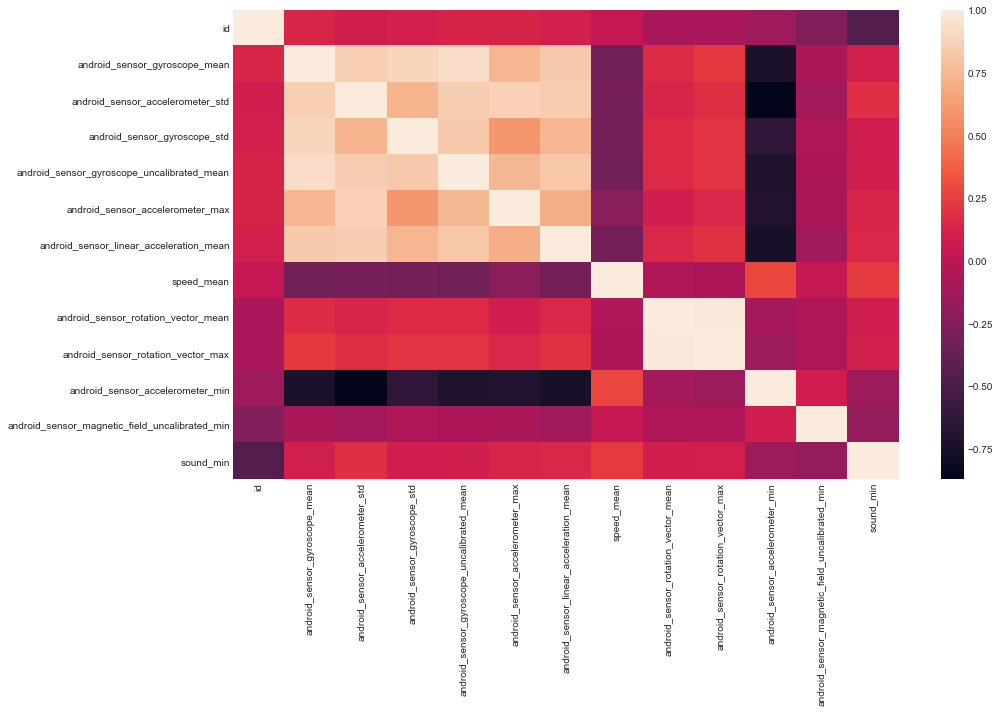

In [11]:
#how does these features correlate?
#Plot heatmap of feature correlation
plt.figure(figsize = (15,10))
sns.heatmap(df.corr())

Mutual information (MI) describes relationships in terms of uncertainty. 
The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.

Because of our little domain knowledge on this project segement, 
we applied MI to deduce which the relevancy of each feature to target.

To compute the mutual information scores for our features

In [12]:
#Mutual information from sklearn only works with object and categorical data
#converting from the float and int data type into categorical
X = X.astype('category')
X.dtypes

id                                                category
user                                              category
android_sensor_gyroscope_mean                     category
android_sensor_accelerometer_std                  category
android_sensor_gyroscope_std                      category
android_sensor_gyroscope_uncalibrated_mean        category
android_sensor_accelerometer_max                  category
android_sensor_linear_acceleration_mean           category
speed_mean                                        category
android_sensor_rotation_vector_mean               category
android_sensor_rotation_vector_max                category
android_sensor_accelerometer_min                  category
android_sensor_magnetic_field_uncalibrated_min    category
sound_min                                         category
dtype: object

In [13]:
#import mutual_info_classif to prob the categorical features
from sklearn.feature_selection import mutual_info_classif

# Utility functions to rank the features
def make_mi_scores(x1, y):
    x1 = x1.copy()
    # Label encoding for categoricals
    for colname in x1.select_dtypes(["category"]):
        x1[colname], _ = x1[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x1.dtypes]
    mi_scores = mutual_info_classif(x1, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x1.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#function to display the ranking in barplot
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

x1 = X.copy()
y = df.target

mi_scores = make_mi_scores(x1, y)

id                                                1.609438
android_sensor_accelerometer_std                  1.609438
android_sensor_accelerometer_max                  1.609438
speed_mean                                        1.609438
android_sensor_accelerometer_min                  1.609202
android_sensor_linear_acceleration_mean           1.497159
android_sensor_rotation_vector_mean               1.426675
android_sensor_rotation_vector_max                1.426204
android_sensor_gyroscope_std                      1.422606
android_sensor_gyroscope_mean                     1.420106
android_sensor_magnetic_field_uncalibrated_min    1.403483
android_sensor_gyroscope_uncalibrated_mean        1.403248
sound_min                                         1.152705
user                                              0.413110
Name: MI Scores, dtype: float64


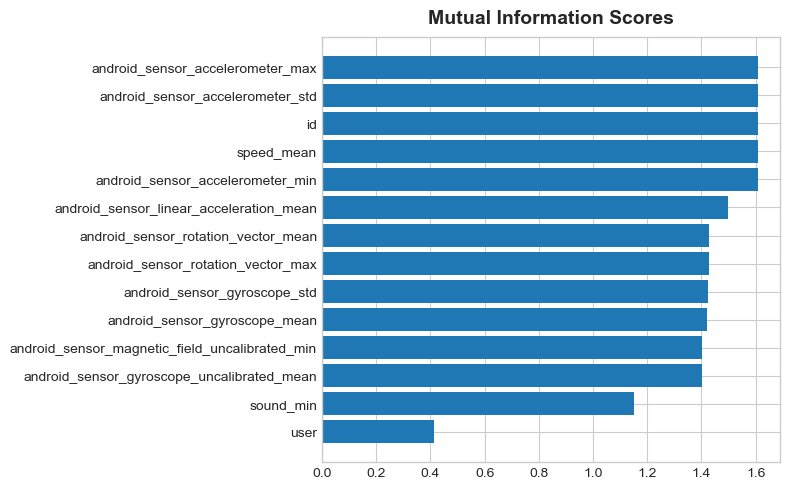

In [14]:
#display MI score...least possible is 0.0, above 2.0 is rare.
print(mi_scores)

#plot to make comparisions easy
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

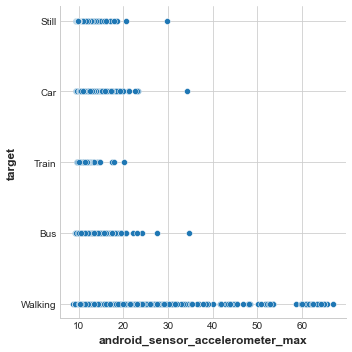

In [15]:
#Visualizing the strongest feature  with respect to the target
sns.relplot(x = 'android_sensor_accelerometer_max', y = 'target', data = df);

Feature tweaking based on Mutual Information scores

In [22]:
#literature suggests that this two features are better when paired
#source: https://www.news-medical.net/health/Types-of-sensors-in-wearable-fitness-trackers.aspx
df["acc_gyro"] = df.android_sensor_rotation_vector_mean * df.android_sensor_gyroscope_mean

#also linear speed would be speed of movement on a straight linear
df["Lin_speed"] = df.android_sensor_accelerometer_min * df.android_sensor_linear_acceleration_mean

#feature to track change in motion in around direction
df["still_sensor"] = df.android_sensor_rotation_vector_max * df.android_sensor_rotation_vector_mean

#testing
df["new_feature"] = df.android_sensor_rotation_vector_max / df.android_sensor_rotation_vector_mean

df[["android_sensor_rotation_vector_mean", "android_sensor_gyroscope_mean", "acc_gyro", "speed_mean", "android_sensor_linear_acceleration_mean", "Lin_speed", "still_sensor"]].head()



,android_sensor_rotation_vector_mean,android_sensor_gyroscope_mean,acc_gyro,speed_mean,android_sensor_linear_acceleration_mean,Lin_speed,still_sensor
0,0.050413,0.001651,0.000083,0.180379,0.020978,0.204721,0.002841
1,0.999981,0.036326,0.036325,14.679876,0.879220,6.776535,0.999981
2,0.610456,0.001525,0.000931,0.180379,0.034110,0.334445,0.372657
3,0.998112,0.036440,0.036372,14.679876,1.488361,11.400356,0.996228
4,0.322242,0.183202,0.059035,14.679876,1.658308,14.867757,0.121870


In [23]:
df.shape

(5893, 19)

In [24]:
df.to_csv("fe_still.csv", index = False)

# Preprocessing

In [ ]:
# change name of columns 
def change_name(df):
    column_names=[]
    for i in df.columns:
        k=i.replace('.','_').replace("#",'_')
        df.rename(columns = {i:k}, inplace = True)
    return df